<a href="https://colab.research.google.com/github/Isurajgarg/Black_Scholes/blob/main/Blackscholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **1. BLACK SCHOLES MERTON MODEL**

##The Black-Scholes model is a fundamental tool in option pricing. It is originally designed for calculating theoretical value of European options on non-dividend paying stocks. The formula for a call option (C) and put option (P) in the absence of dividends is as follows:

# **1.1 Without Dividend paying stocks**
$$C = S_0N(d1)-ke^{-rt}N(d2)$$
$$P = ke^{-rt}N(-d2)- S_0N(-d1)$$

##Where :-

$$d1 = \frac{(ln(S_0/k)+(r+\sigma^2/2)*t)}{(\sigma*√t)}$$

##And

$$d2 = d1-\sigma*√t$$

# **1.2 With Dividend paying stocks**

##For dividend-paying stocks, the Modified Black-Scholes model is. The adjusted formula for a call option (C) and put option (P) becomes:

  
$$C = S_0e^{-qt}N(d1)-(ke^{-rt})N(d2)$$

$$P = (ke^{-rt}N(-d2)-S_0e^{-q*t}N(-d1)$$



##Where (q) is the continuous dividend yield, and (N) represents the cumulative distribution function of the standard normal distribution. The variables (d_1) and (d_2) are calculated as mentioned earlier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def black_scholes_without_div(S_0, k, r, T, sigma, option_type='call'):
    """
    Calculates the Black-Scholes option price for a European call or put option without dividend
    Parameters:
    - S_0: Current stock price
    - K: Option's strike price
    - r: Risk-free interest rate
    - T: Time to expiration in years
    - sigma: Volatility of the underlying stock
    - option_type: Type of option - 'call' or 'put'
    Returns:
    - Option price calculated using the Black-Scholes formula
    """
    d1 = (np.log(S_0 / k) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
       option_price = S_0 * norm.cdf(d1) - k * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
       option_price = k * np.exp(-r * T) * norm.cdf(-d2) - S_0 * norm.cdf(-d1)
    else:
       raise ValueError('Option type should be "call" or "put".')
    return np.round(option_price, 4)

In [3]:
# Now we calculate Option price using Black Scholes without Dividend.
S_0 = 50
k = 49
r = 0.1
T = 3/12
sigma = 0.2
option_price = black_scholes_without_div(S_0,k,r,T,sigma,option_type='call')

In [4]:
print('Option Price is', option_price)

Option Price is 3.2504


In [5]:

# Black Scholes of continuous dividend

def black_scholes_with_div(S_0, k, r, T, q, sigma, option_type='call'):
    """
    Calculates the Black-Scholes option price for a European call or put option with continuous dividends.
    Parameters:
    - S_0: Current stock price
    - K: Option's strike price
    - r: Risk-free interest rate
    - T: Time to expiration in years
    - q: Continuous dividend yield
    - sigma: Volatility of the underlying stock
    - option_type: Type of option - 'call' or 'put'
    Returns:
    - Option price calculated using the Black-Scholes model with continuous dividends
    """
    d1 = (np.log(S_0 / k) + (r - q + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
       option_price = S_0 * np.exp(-q * T) * norm.cdf(d1) - k * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
         option_price = k * np.exp(-r * T) * norm.cdf(-d2) - S_0 * np.exp(-q * T) * norm.cdf(-d1)
    else:
         raise ValueError('Option type should be "call" or "put".')
    return np.round(option_price, 4)

In [6]:
# Here we calculate option price with Dividend yield using black scholes
S_0 = 90
k = 100
r = 0.1
T = 6/12
q = 0.02
sigma = 0.2
option_price = black_scholes_with_div(S_0 , k, r , T , q , sigma, option_type = 'put' )

In [7]:
print('Option Price is',option_price)

Option Price is 8.7456


##1.3 Option Value for different Maturity

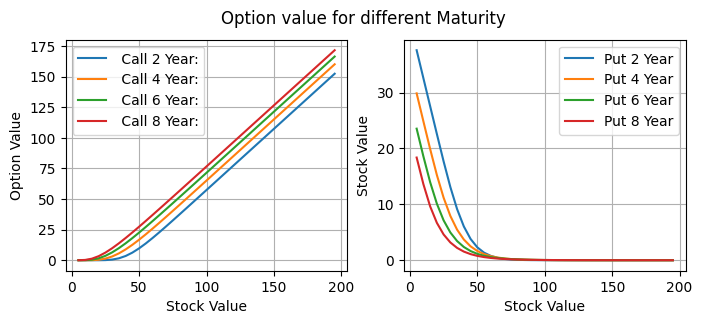

In [8]:
# Here we find/calculate option price for different maturities.
stock_prices = np.arange(5,200,5)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
for t in [2,4,6,8]:
    C = [black_scholes_with_div(S_0 = S , k = 52 ,T = t ,r = 0.1 , q= 0, sigma = 0.2 , option_type ='call') for S in stock_prices]
    plt.plot(stock_prices , C , label = ' Call %d Year:' %t)
plt.legend()
plt.grid(True)
plt.xlabel('Stock Value')
plt.ylabel('Option Value')
plt.subplot(1,2,2)
stock_prices = np.arange(5,200,5)
for t in [2,4,6,8]:
    P = [black_scholes_with_div(S_0 = S , k = 52 ,T = t , r = 0.1 , q= 0, sigma = 0.2,option_type ='put') for S in stock_prices]
    plt.plot(stock_prices ,P, label = 'Put %d Year' %t)
plt.legend()
plt.xlabel('Stock Value')
plt.ylabel('Stock Value')
plt.grid()
plt.suptitle('Option value for different Maturity ')
plt.show()

##1.4 Option Value for different Risk Free Rate

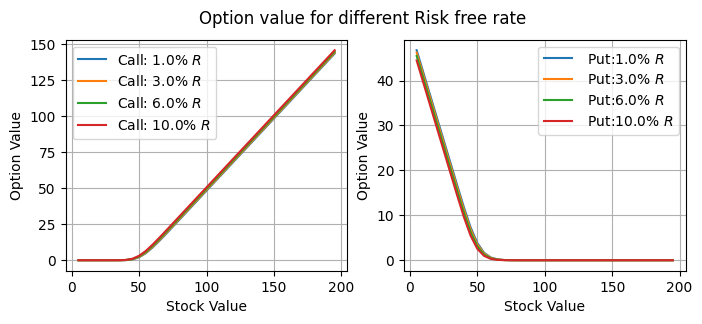

In [9]:
# Here we find/calculate option price for different risk free rate.
stock_prices = np.arange(5,200,5)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
for R in [0.01,0.03,0.06,0.1]:
    C = [black_scholes_with_div(S_0 = S , k = 52 ,T = 6/12 ,r = R , q= 0, sigma = 0.2 , option_type ='call') for S in stock_prices]
    plt.plot(stock_prices , C , label = f'Call: {R:.1%} $R$' )
plt.legend()
plt.grid(True)
plt.xlabel('Stock Value')
plt.ylabel('Option Value')
plt.subplot(1,2,2)
stock_prices = np.arange(5,200,5)
for R in [0.01,0.03,0.06,0.1]:
    P = [black_scholes_with_div(S_0 = S , k = 52 ,T = 6/12 , r = R , q= 0, sigma = 0.2,option_type ='put') for S in stock_prices]
    plt.plot(stock_prices ,P, label = f' Put:{R:.1%} $R$' )
plt.legend()
plt.xlabel('Stock Value')
plt.ylabel('Option Value')
plt.grid()
plt.suptitle('Option value for different Risk free rate ')
plt.show()

##1.5 Option Value for different Volatility

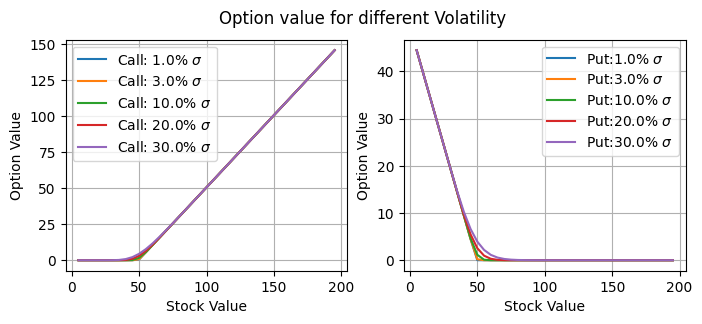

In [10]:


stock_prices = np.arange(5,200,5)
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
for v in [0.01,0.03,0.1,0.2,0.3]:
    C = [black_scholes_with_div(S_0 = S , k = 52 ,T = 6/12 ,r = 0.1, q= 0, sigma = v, option_type ='call') for S in stock_prices]
    plt.plot(stock_prices , C , label = f'Call: {v:.1%} $\sigma$' )
plt.legend()
plt.grid(True)
plt.xlabel('Stock Value')
plt.ylabel('Option Value')

plt.subplot(1,2,2)
stock_prices = np.arange(5,200,5)
for v in [0.01,0.03,0.1,0.2,0.3]:
    P = [black_scholes_with_div(S_0 = S , k = 52 ,T = 6/12 , r = 0.1 , q= 0, sigma = v,option_type ='put') for S in stock_prices]
    plt.plot(stock_prices ,P, label = f'Put:{v:.1%} $\sigma$' )
plt.legend()
plt.xlabel('Stock Value')
plt.ylabel('Option Value')
plt.grid()
plt.suptitle('Option value for different Volatility ')
plt.show()